###**Importando Dependências**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Leitura do Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/imdb_top_1000.csv")

### **Primeiras impressões do dataset**

In [ ]:
quantidade_filmes = f"O dataset possui {df.shape[0]} Filmes"
quantidade_filmes

'O dataset possui 1000 Filmes'

In [ ]:
primeiras_quatro_linhas = df.head()
primeiras_quatro_linhas

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Ajustando o IMDB_rating quando for comparado ao Meta_score

In [ ]:
df['IMDB_Rating'] = df['IMDB_Rating'] * 10

In [ ]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,79.493000,77.971530,2.736929e+05
std,2.754912,12.376099,3.273727e+05
min,76.000000,28.000000,2.508800e+04
25%,77.000000,70.000000,5.552625e+04
50%,79.000000,79.000000,1.385485e+05
75%,81.000000,87.000000,3.741612e+05
max,93.000000,100.000000,2.343110e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
# Colunas Nulas
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


A relação do número de votos com a quantidade de dinheiro que o filme gerou é forte, visto que o valor é próximo de 60%

### **Limpeza e Tratamentos**
O dataset, de modo geral, não requer grandes etapas de limpeza. No entanto, para garantir a consistência nas análises, é essencial que todos os dados estejam completos para cada filme. Por isso, os registros com qualquer campo nulo serão removidos. Além disso, para facilitar a interpretação, o tempo de duração dos filmes será convertido do formato em minutos para horas e minutos.

In [ ]:
df = df.dropna()

Podemos verificar que a coluna "Gross", que indica a quantidade de dinheiro que o filme gerou, está como objeto, e precisamos colocar como um valor 'int' para podermos realizar a função de correlação entre "IMDB_Rating"	"Meta_score" "No_of_Votes" e o próprio "Gross". Além disso, precisamos remover todos os filmes que não nos informam o valor do Gross.

In [ ]:
df = df.copy()
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].astype(int)
df['Gross'].dtype

dtype('int64')

In [ ]:
df.corr(numeric_only=True)

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.280894,0.623142,0.125992
Meta_score,0.280894,1.000000,0.029744,-0.014801
No_of_Votes,0.623142,0.029744,1.000000,0.544882
Gross,0.125992,-0.014801,0.544882,1.000000


In [ ]:
def converter_runtime_minutos_int(runtime):
  minutos = int(runtime.replace(' min', ''))
  return minutos

def converter_formato_m_para_hh_mm(runtime):
    minutos = runtime
    horas = minutos // 60
    minutos_restantes = minutos % 60

    return f"{horas}h e {minutos_restantes} min"

df['Runtime'] = df['Runtime'].apply(converter_runtime_minutos_int)

df['Formated_Runtime'] = df['Runtime'].apply(converter_formato_m_para_hh_mm)

df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Formated_Runtime
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,93.0,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,2h e 22 min
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",92.0,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,2h e 55 min
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",90.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,2h e 32 min
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",90.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,3h e 22 min
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",90.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,1h e 36 min


Convertendo a coluna de Released_Year para numerivo, no meio do caminho descobrimos que existia um valor que não era um número, tivemos que removê-lo do dataset

In [ ]:
# Convertendo a coluna de Released year para numerico, e os erros que aparecerem
# são preenchidos com o valor NAN, pois iremos removê-los depois
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Remover os NAN
df = df.dropna(subset=['Released_Year'])

# Convertendo para INT
df = df.copy()
df['Released_Year'] = df['Released_Year'].astype(int)

In [ ]:
quantidade_filmes = f"O dataset possue {df.shape[0]} Filmes após todas as limpezas"
quantidade_filmes

'O dataset possue 713 Filmes após todas as limpezas'

## Ideias
1. Comparar a média das notas agrupando diferentes anos

2. Comparar a média das notas agrupando diferentes generos (Intereção no Streamlit)

3. Quais são os diretores mais bem sucedidos em questão das notas? e os menos sucedidos?

4. Dos diretores mais bem sucedidos e dos menos, quais gêneros eles mais costumam produzir?

5. A duração do filme tem alguma influencia na nota dele?

6. Quais são as estrelas (atores principais) mais bem sucedidos? e os menos sucedidos?




## Separando a média das notas por período de tempo

Para realizarmos essa análise, primeiramente iremos encontrar quantos filmes temos para cada ano, para termos uma noção de quantos filmes por anos temos no dataset. Para isso queremos descobrir o menor e o maior ano que existe no dataset

In [ ]:
# Registro do filme mais antigo
menor_ano = df['Released_Year'].min()
menor_ano

1930

In [ ]:
# Registro do filme mais novo
maior_ano = df['Released_Year'].max()
maior_ano

2019

Pensamos em criar uma função que agrupa de 20 em 20 anos primeiro, para podermos começar

In [ ]:
df['Released_Year'].groupby(df['Released_Year']).count()

,Released_Year
Released_Year,
1930,1
1931,1
1933,1
1934,1
1936,1
...,...
2015,18
2016,20
2017,18


In [ ]:
# Criando os grupos de 20 em 20 anos
menor_ano = df['Released_Year'].min()
maior_ano = df['Released_Year'].max()
tamanho_recorte = 20

def criar_recortes(menor_ano, maior_ano, tamanho_recorte):
  results = []
  for ano in range(menor_ano, maior_ano + 1, tamanho_recorte):
    ultimo_ano = min(ano + tamanho_recorte - 1, maior_ano)
    recorte_ano = df[(df['Released_Year'] >= ano) & (df['Released_Year'] <= ultimo_ano)]

    if not recorte_ano.empty:
      media_IMDB = recorte_ano['IMDB_Rating'].mean()
      media_Meta = recorte_ano['Meta_score'].mean()
      quantidade_filmes = recorte_ano.shape[0]
      results.append({'recorte_anual': f'{ano}-{ultimo_ano}', 'media_IMDB': media_IMDB, 'media_Meta': media_Meta, 'quantidade': quantidade_filmes})

  df_media_anual = pd.DataFrame(results)
  df_media_anual = df_media_anual.sort_values(by='recorte_anual', ascending=False)
  return df_media_anual

criar_recortes(menor_ano, maior_ano, tamanho_recorte)

,recorte_anual,media_IMDB,media_Meta,quantidade
4,2010-2019,78.977654,77.592179,179
3,1990-2009,79.237805,73.820122,328
2,1970-1989,79.503817,78.511450,131
1,1950-1969,80.553571,86.500000,56
0,1930-1949,81.157895,93.842105,19


Podemos perceber que de 1928 a 1947, temos apenas 28 filmes, e entre 1948-1967 temos apenas 74, que quando comparado aos outros recortes, é um número muito inferior, e pode atrapalhar a análise, por termos poucos dados a respeito desses recortes.

Possivelmente, criando recortes menores e apenas dos filmes apartir de 1967, podemos obter alguma informação a mais.

In [ ]:
tamanho_recorte = 3
menor_ano = 1967
criar_recortes(menor_ano, maior_ano, tamanho_recorte)

,recorte_anual,media_IMDB,media_Meta,quantidade
17,2018-2019,79.925926,78.592593,27
16,2015-2017,78.571429,79.303571,56
15,2012-2014,78.953125,77.359375,64
14,2009-2011,78.781818,74.509091,55
13,2006-2008,78.915254,74.932203,59
12,2003-2005,78.850000,71.600000,60
11,2000-2002,79.172414,74.155172,58
10,1997-1999,79.826087,72.695652,46
9,1994-1996,80.647059,76.764706,34
8,1991-1993,78.975000,73.600000,40


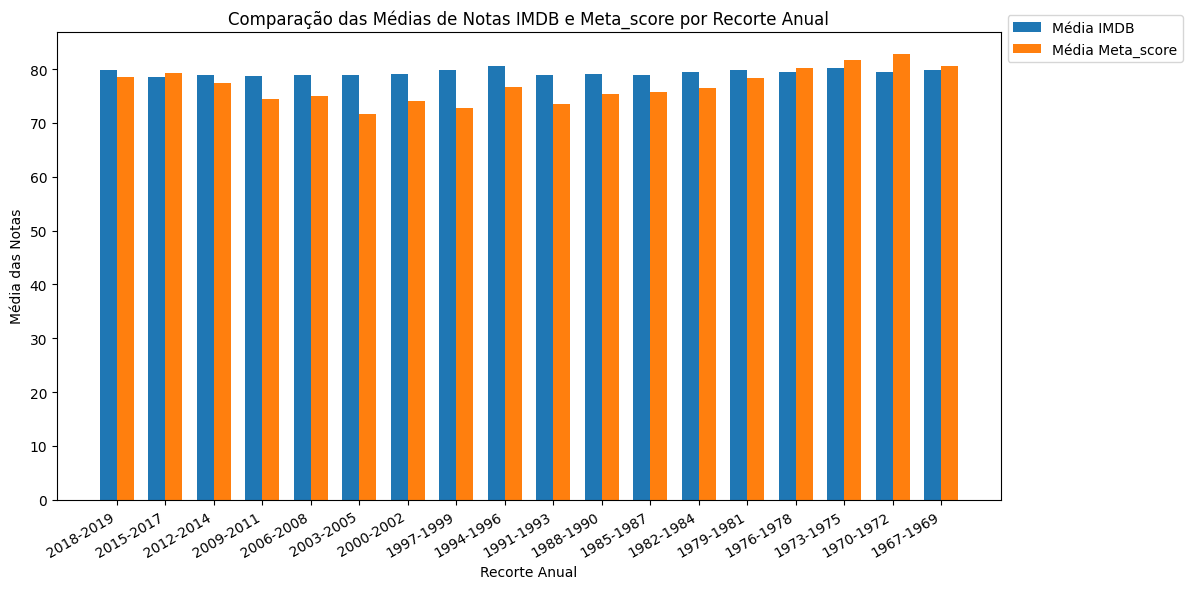

In [ ]:
df_media_anual = criar_recortes(menor_ano, maior_ano, tamanho_recorte)

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Definindo a largura das barras
largura_barra = 0.35

# Calculando as posições das barras no eixo x
i = np.arange(len(df_media_anual['recorte_anual']))

# Criando as barras para as médias IMDB
barra_1 = ax.bar(i, df_media_anual['media_IMDB'], largura_barra, label='Média IMDB')

# Criando as barras para as médias Meta_score
barra_2 = ax.bar(i + largura_barra, df_media_anual['media_Meta'], largura_barra, label='Média Meta_score')

# Adicionando rótulos e título
ax.set_xlabel('Recorte Anual')
ax.set_ylabel('Média das Notas')
ax.set_title('Comparação das Médias de Notas IMDB e Meta_score por Recorte Anual')
ax.set_xticks(i + largura_barra / 2)
ax.set_xticklabels(df_media_anual['recorte_anual'], rotation=30, ha='right')
ax.legend(bbox_to_anchor=(1.2, 1.05))

# Ajustando o layout para evitar sobreposição de rótulos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

## Comparando a média das notas agrupando diferentes generos

A ideia será analisar qual gênero possui melhores médias de notas, para extrair alguma informação a respeito da aprovação de cada um deles.

In [ ]:
df['Genre'].head()

,Genre
0,Drama
1,"Crime, Drama"
2,"Action, Crime, Drama"
3,"Crime, Drama"
4,"Crime, Drama"


Podemos notar que cada filme pode ter mais de um gênero associado, então precisamos criar várias combinações de gêneros para podermos analisar. Isso porque um filme que seja de apenas 'Drama', é muito diferente de um filme que possua Crime e Ação, além de drama, por exemplo.

In [ ]:
df["Genre"].value_counts()

,count
Genre,
Drama,58
"Drama, Romance",26
"Comedy, Drama",24
"Crime, Drama, Thriller",22
"Action, Adventure, Sci-Fi",21
...,...
"Crime, Film-Noir, Thriller",1
"Film-Noir, Mystery, Thriller",1
"Action, Adventure, Romance",1


#### Tabela em ordem decrescente avaliado por Meta Score


In [ ]:
recorte = 10
ordenacao = 'media_Meta'

# Calculando a média das notas por gênero, excluindo gêneros com 10 ou menos instâncias
def calcular_media_notas_por_genero(df, recorte, ordenacao):
  cont_generos = df['Genre'].value_counts()
  filtro_generos = cont_generos[cont_generos > recorte].index
  cont_generos_filtrado = cont_generos[cont_generos > recorte]
  df_filtrado = df[df['Genre'].isin(filtro_generos)]

  # Criando as médias das 2 notas e depois concantenando e limpando os index.
  df_generos_IMDB = df_filtrado.groupby('Genre')['IMDB_Rating'].mean()
  df_generos_Meta = df_filtrado.groupby('Genre')['Meta_score'].mean()
  df_nota_por_generos = pd.concat([df_generos_IMDB, df_generos_Meta, cont_generos_filtrado], axis=1)
  df_nota_por_generos = df_nota_por_generos.reset_index()
  df_nota_por_generos = df_nota_por_generos.rename(
      columns={"Meta_score": "media_Meta","IMDB_Rating": "media_IMDB","count": "quantidade"}
      )
  df_nota_por_generos = df_nota_por_generos.sort_values(by=ordenacao, ascending=False)

  # Exibindo as médias de notas por gênero
  return df_nota_por_generos

calcular_media_notas_por_genero(df, recorte, ordenacao)

,Genre,media_IMDB,media_Meta,quantidade
3,"Animation, Adventure, Comedy",79.250000,84.250000,20
14,"Drama, Romance",79.384615,81.269231,26
10,"Crime, Drama",82.052632,80.947368,19
8,"Comedy, Drama",78.500000,80.500000,24
0,"Action, Adventure, Drama",82.250000,80.416667,12
5,"Biography, Drama, History",79.800000,78.650000,20
6,Comedy,78.333333,77.833333,12
13,Drama,79.500000,77.275862,58
9,"Comedy, Drama, Romance",78.526316,76.789474,19
7,"Comedy, Crime, Drama",79.000000,76.166667,12


#### Gráfico em ordem decrescente avaliado por Meta Score

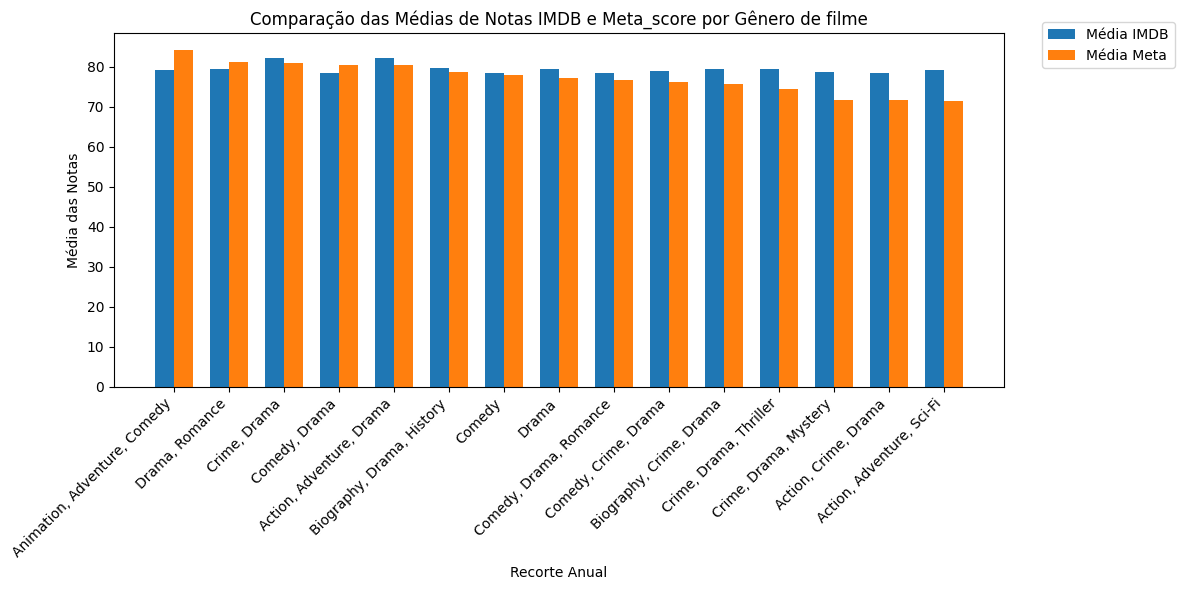

In [ ]:
df_media_genero = calcular_media_notas_por_genero(df, recorte, ordenacao)
def grafico_media_genero(df_media_genero):
  # Criando o gráfico de barras
  fig, ax = plt.subplots(figsize=(12, 6))

  # Definindo a largura das barras
  largura_barra = 0.35

  # Calculando as posições das barras no eixo x
  i = np.arange(len(df_media_genero['Genre']))

  # Criando as barras para as médias IMDB
  barra_1 = ax.bar(i, df_media_genero['media_IMDB'], largura_barra, label='Média IMDB')

  # Criando as barras para as médias Meta_score
  barra_2 = ax.bar(i + largura_barra, df_media_genero['media_Meta'], largura_barra, label='Média Meta')

  # Adicionando rótulos e título
  ax.set_xlabel('Recorte Anual')
  ax.set_ylabel('Média das Notas')
  ax.set_title('Comparação das Médias de Notas IMDB e Meta_score por Gênero de filme')
  ax.set_xticks(i + largura_barra / 2)
  ax.set_xticklabels(df_media_genero['Genre'], rotation=45, ha='right')
  ax.legend(bbox_to_anchor=(1.2, 1.05))

  # Ajustando o layout para evitar sobreposição de rótulos
  plt.tight_layout()

  # Exibindo o gráfico
  plt.show()

grafico_media_genero(df_media_genero)

#### Tabela em ordem decrescente avaliado por IMDB

In [ ]:
recorte = 10
ordenacao = 'media_IMDB'

calcular_media_notas_por_genero(df, recorte, ordenacao)

,Genre,media_IMDB,media_Meta,quantidade
0,"Action, Adventure, Drama",82.250000,80.416667,12
10,"Crime, Drama",82.052632,80.947368,19
5,"Biography, Drama, History",79.800000,78.650000,20
13,Drama,79.500000,77.275862,58
4,"Biography, Crime, Drama",79.466667,75.600000,15
14,"Drama, Romance",79.384615,81.269231,26
12,"Crime, Drama, Thriller",79.363636,74.454545,22
1,"Action, Adventure, Sci-Fi",79.285714,71.523810,21
3,"Animation, Adventure, Comedy",79.250000,84.250000,20
7,"Comedy, Crime, Drama",79.000000,76.166667,12


#### Gráfico em ordem decrescente avaliado por IMDB

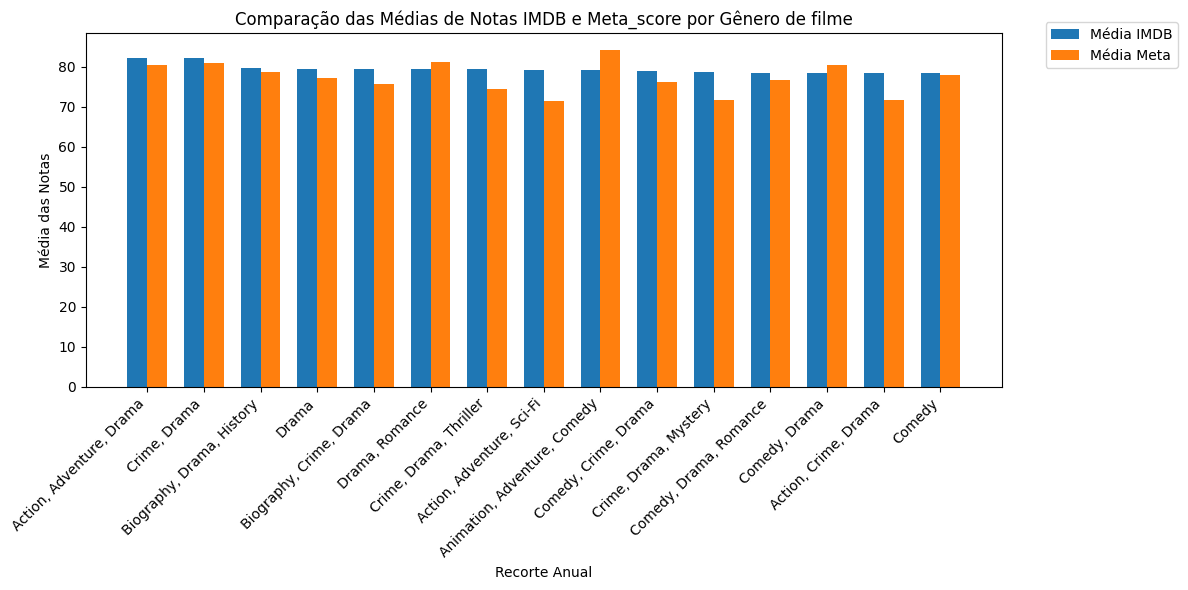

In [ ]:
df_media_genero = calcular_media_notas_por_genero(df, recorte, ordenacao)
grafico_media_genero(df_media_genero)

Após realizar a análise, podemos concluir que existem claramente algumas combinações de gêneros de filmes são mais bem avaliadas do que outras, e isso é mais perceptível no Meta_score, que a diferença do mais bem avaliado para o menos é de aproximadamente 12%. Para uma melhor visualização, optamos por criar um gráfico ordenando por IMDB e outro por Meta score.

Dependendo da nota do site do IMBD ou do Meta_score, temos rankings diferentes entre os gêneros.

## Buscando os diretores mais e menos sucedidos

A ideia será analisar quais diretores possuem melhores médias de notas, para extrair alguma informação a respeito da aprovação de cada um deles, e descobrir quem obteve um maior sucesso.

In [ ]:
df['Director'].value_counts()

,count
Director,
Steven Spielberg,13
Martin Scorsese,10
Alfred Hitchcock,9
Christopher Nolan,8
Clint Eastwood,8
...,...
Jon Favreau,1
Yimou Zhang,1
Danis Tanovic,1


#### Tabela em ordem decrescente avaliado por Meta Score

In [ ]:
ordenacao = 'media_Meta'

def calcular_media_notas_por_diretor(df, ordenacao, recorte=5):
  cont_diretores = df['Director'].value_counts()
  filtro_diretores = cont_diretores[cont_diretores > recorte].index
  df_filtrado = df[df['Director'].isin(filtro_diretores)]

  df_media = df.groupby('Director', observed=True).agg(
    media_IMDB=('IMDB_Rating', 'mean'),
    media_Meta=('Meta_score', 'mean')
  )

  df_media['quantidade'] = cont_diretores
  df_media = df_media.reset_index()

  return df_media.sort_values(by=ordenacao, ascending=False)

calcular_media_notas_por_diretor(df, ordenacao)

,Director,media_IMDB,media_Meta,quantidade
137,Ingmar Bergman,81.0,100.0,1
274,Orson Welles,81.5,99.5,2
247,Michael Curtiz,82.0,98.5,2
193,Joseph L. Mankiewicz,82.0,98.0,1
125,Guillermo del Toro,82.0,98.0,1
...,...,...,...,...
380,Troy Duffy,78.0,44.0,1
1,Abhishek Kapoor,77.0,40.0,1
197,José Padilha,80.0,33.0,1
93,Eric Bress,76.0,30.0,1


#### Tabela em ordem decrescente avaliado por IMDB

In [ ]:
ordenacao = 'media_IMDB'
calcular_media_notas_por_diretor(df, ordenacao)

,Director,media_IMDB,media_Meta,quantidade
103,Frank Darabont,89.5,70.5,2
211,Lana Wachowski,87.0,73.0,1
138,Irvin Kershner,87.0,82.0,1
116,George Lucas,86.0,90.0,1
318,Roberto Benigni,86.0,59.0,1
...,...,...,...,...
372,Tom Tykwer,76.0,77.0,1
325,Ronny Yu,76.0,70.0,1
347,Stephen Frears,76.0,77.0,1
375,Tony Bancroft,76.0,71.0,1


#### Tabela analisando Gross com notas médias dos diretores

Após analisarmos o ranqueamento dos diretores, podemos pensar também se a avaliação deles reflete em um maior ganho material. Podemos então relacionar os ganhos com as notas médias, e tentar descobrir algum padrão.

In [ ]:
def media_gross_diretor(df, recorte=5):
    cont_diretores = df['Director'].value_counts()
    filtro_diretores = cont_diretores[cont_diretores > recorte].index
    df_filtrado = df[df['Director'].isin(filtro_diretores)]


    df_media = df_filtrado.groupby('Director', observed=True).agg(
      media_Gross=('Gross', 'mean'),
      media_IMDB=('IMDB_Rating', 'mean'),
      media_Meta=('Meta_score', 'mean'),
    )

    df_media['quantidade'] = cont_diretores
    df_media = df_media.reset_index()
    return df_media.sort_values(by='media_Gross', ascending=False)

media_gross_diretor(df)


,Director,media_Gross,media_IMDB,media_Meta,quantidade
1,Christopher Nolan,2.421818e+08,84.625000,77.500000,8
12,Steven Spielberg,1.906256e+08,80.307692,80.538462,13
9,Ridley Scott,1.277852e+08,80.833333,78.333333,6
7,Quentin Tarantino,9.087929e+07,81.750000,78.250000,8
3,David Fincher,8.916431e+07,80.375000,73.125000,8
2,Clint Eastwood,7.408658e+07,79.125000,77.125000,8
10,Rob Reiner,5.436098e+07,78.285714,71.714286,7
6,Martin Scorsese,5.383192e+07,81.700000,82.600000,10
13,Wes Anderson,3.785003e+07,78.333333,83.166667,6
14,Woody Allen,3.339667e+07,78.142857,81.428571,7


Apenas observando a tabela, podemos perceber que Alfred Hitchcock tem 11 filmes no dataset, e a melhor avaliação do Meta score, e uma das melhores do site IMDB porém está entre os últimos que mais ganharam dinheiro com filmes. Logo, podemos afirmar que não existe nenhuma relação direta entre o quanto o filme gerou de dinheiro e suas notas.

#### Analisando quais gêneros eles costumam produzir

In [ ]:
def medias_e_generos_diretor(df, recorte=5):
    cont_diretores = df['Director'].value_counts()
    filtro_diretores = cont_diretores[cont_diretores > recorte].index
    df_filtrado = df[df['Director'].isin(filtro_diretores)]

    df_media = df.groupby('Director', observed=True).agg(
        media_IMDB = ('IMDB_Rating', 'mean'),
        media_Meta = ('Meta_score', 'mean'),
        media_Gross = ('Gross', 'mean'),
        genero_mais_frequente=('Genre', lambda x: x.value_counts().index[0])
    )

    df_media['quantidade'] = cont_diretores
    df_media = df_media.reset_index()

    return df_media.sort_values(by='media_IMDB', ascending=False)

medias_e_generos_diretor(df)

,Director,media_IMDB,media_Meta,media_Gross,genero_mais_frequente,quantidade
103,Frank Darabont,89.5,70.5,82571421.5,Drama,2
211,Lana Wachowski,87.0,73.0,171479930.0,"Action, Sci-Fi",1
138,Irvin Kershner,87.0,82.0,290475067.0,"Action, Adventure, Fantasy",1
116,George Lucas,86.0,90.0,322740140.0,"Action, Adventure, Fantasy",1
318,Roberto Benigni,86.0,59.0,57598247.0,"Comedy, Drama, Romance",1
...,...,...,...,...,...,...
372,Tom Tykwer,76.0,77.0,7267585.0,"Crime, Drama, Thriller",1
325,Ronny Yu,76.0,70.0,24633730.0,"Action, Biography, Drama",1
347,Stephen Frears,76.0,77.0,37707719.0,"Biography, Comedy, Drama",1
375,Tony Bancroft,76.0,71.0,120620254.0,"Animation, Adventure, Family",1


## Duração do filme e influência na nota

A ideia será analisar a duração dos filmes com melhores médias de notas, para extrair alguma informação a respeito da aprovação de cada um deles, e descobrir qual duração de filme tem um maior sucesso.

In [ ]:
bins = [0, 90, 120, 150, 180, 220, 250]
labels = ['Até 90 minutos', '90 a 120 minutos', '120 a 150 minutos', '150 a 180 minutos', '180 a 220 minutos', '220 a 250 minutos']
df['duracao'] = pd.cut(df['Runtime'], bins=bins, labels=labels, right=False)
df['duracao'].value_counts()

,count
duracao,
90 a 120 minutos,312
120 a 150 minutos,263
150 a 180 minutos,74
Até 90 minutos,35
180 a 220 minutos,26
220 a 250 minutos,3


#### Tabela em ordem decrescente avaliado por Meta Score

In [ ]:
ordenacao = 'media_Meta'

# Calculando a média das notas por intervalos de tempo
def calcular_media_notas_por_intervalo(df, ordenacao):
  cont_duracao = df['duracao'].value_counts()

  df_media = df.groupby('duracao', observed=True).agg(
      media_IMDB=('IMDB_Rating', 'mean'),
      media_Meta=('Meta_score', 'mean')
  )

  # Adiciona a contagem de filmes por ator
  df_media['quantidade'] = cont_duracao

  df_media = df_media.reset_index()

  # Ordena o dataframe pelo critério definido
  df_media = df_media.sort_values(by=ordenacao, ascending=False)

  return df_media

calcular_media_notas_por_intervalo(df, ordenacao)

,duracao,media_IMDB,media_Meta,quantidade
5,220 a 250 minutos,81.666667,93.666667,3
0,Até 90 minutos,78.885714,81.085714,35
4,180 a 220 minutos,81.230769,79.153846,26
1,90 a 120 minutos,78.868590,77.416667,312
3,150 a 180 minutos,80.783784,77.067568,74
2,120 a 150 minutos,79.437262,75.969582,263


#### Tabela em ordem decrescente avaliado por IMDB

In [ ]:
ordenacao = 'media_IMDB'
calcular_media_notas_por_intervalo(df, ordenacao)

,duracao,media_IMDB,media_Meta,quantidade
5,220 a 250 minutos,81.666667,93.666667,3
4,180 a 220 minutos,81.230769,79.153846,26
3,150 a 180 minutos,80.783784,77.067568,74
2,120 a 150 minutos,79.437262,75.969582,263
0,Até 90 minutos,78.885714,81.085714,35
1,90 a 120 minutos,78.868590,77.416667,312


#### Tabela analisando Gross com notas médias de cada duração de filme

Podemos pensar também se a duração do filme reflete em um maior ganho material.

In [ ]:
def media_gross_duracao(df):
  cont_duracao = df['duracao'].value_counts()

  df_media = df.groupby('duracao', observed=True).agg(
    media_Gross=('Gross', 'mean'),
    media_IMDB=('IMDB_Rating', 'mean'),
    media_Meta=('Meta_score', 'mean')
  )

  # Adiciona a contagem de filmes por ator
  df_media['quantidade'] = cont_duracao

  df_media = df_media.reset_index()

  # Ordena o dataframe pelo critério definido
  df_media = df_media.sort_values(by='media_Gross', ascending=False)

  return df_media

media_gross_duracao(df)

,duracao,media_Gross,media_IMDB,media_Meta,quantidade
4,180 a 220 minutos,1.184081e+08,81.230769,79.153846,26
3,150 a 180 minutos,1.053992e+08,80.783784,77.067568,74
2,120 a 150 minutos,9.018073e+07,79.437262,75.969582,263
5,220 a 250 minutos,8.119025e+07,81.666667,93.666667,3
1,90 a 120 minutos,6.170774e+07,78.868590,77.416667,312
0,Até 90 minutos,5.122254e+07,78.885714,81.085714,35


Apenas observando a tabela, podemos perceber que filmes mais longos tendem a ganhar mais dinheiro, salva a excessão para filmes que ultrapassam 220 minutos de duração. Logo, podemos afirmar existe uma relação direta entre o quanto o filme gerou de dinheiro e a sua duração.

#### Analisando quais gêneros eles costumam produzir

In [ ]:
def medias_e_generos_duracao(df):

    cont_duracao = df['duracao'].value_counts()

    # Calculando as médias (ficou mais fácil calculá-las
    # denovo ao invés de utilizar os outros dataframes)
    df_media = df.groupby('duracao', observed=True).agg(
        media_IMDB = ('IMDB_Rating', 'mean'),
        media_Meta = ('Meta_score', 'mean'),
        media_Gross = ('Gross', 'mean'),
        genero_mais_frequente=('Genre', lambda x: x.value_counts().index[0])
    )

    df_media['quantidade'] = cont_duracao
    df_media = df_media.reset_index()

    return df_media.sort_values(by='media_IMDB', ascending=False)

medias_e_generos_duracao(df)

,duracao,media_IMDB,media_Meta,media_Gross,genero_mais_frequente,quantidade
5,220 a 250 minutos,81.666667,93.666667,8.119025e+07,"Adventure, Biography, Drama",3
4,180 a 220 minutos,81.230769,79.153846,1.184081e+08,"Action, Adventure, Drama",26
3,150 a 180 minutos,80.783784,77.067568,1.053992e+08,"Crime, Drama",74
2,120 a 150 minutos,79.437262,75.969582,9.018073e+07,Drama,263
0,Até 90 minutos,78.885714,81.085714,5.122254e+07,"Animation, Family, Fantasy",35
1,90 a 120 minutos,78.868590,77.416667,6.170774e+07,Drama,312


## Buscando as estrelas mais e menos sucedidos

A ideia será analisar quais diretores possuem melhores médias de notas, para extrair alguma informação a respeito da aprovação de cada um deles, e descobrir quem obteve um maior sucesso.

In [ ]:
def get_all_stars_count():
  all_stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
  return all_stars.value_counts()

get_all_stars_count()

,count
Robert De Niro,16
Al Pacino,13
Tom Hanks,13
Brad Pitt,12
Clint Eastwood,11
...,...
Charlotte Rampling,1
Rosanna Arquette,1
Jeff Daniels,1
Kyle MacLachlan,1


#### Tabela em ordem decrescente avaliado por Meta Score

In [ ]:
recorte = 5
ordenacao = 'media_Meta'

def calcular_media_notas_por_estrela(df, recorte, ordenacao):
  cont_estrelas = get_all_stars_count()
  filtro_estrelas = cont_estrelas[cont_estrelas > recorte].index
  df_filtrado = df[df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda row: any(star in filtro_estrelas for star in row), axis=1)]

  df_long = df_filtrado.melt(
    id_vars=['IMDB_Rating', 'Meta_score'],
    value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
    value_name='Star'
  )

  df_media = df_long.groupby('Star').agg(
      media_IMDB=('IMDB_Rating', 'mean'),
      media_Meta=('Meta_score', 'mean')
  )

  df_media['quantidade'] = cont_estrelas

  df_media = df_media.loc[filtro_estrelas]
  df_media = df_media.reset_index()
  df_media = df_media.rename(columns={"index": "estrela"})
  df_media = df_media.sort_values(by=ordenacao, ascending=False)

  return df_media

calcular_media_notas_por_estrela(df, recorte, ordenacao)

,estrela,media_IMDB,media_Meta,quantidade
26,Paul Newman,80.166667,82.000000,6
34,Bill Murray,78.166667,80.833333,6
30,Julianne Moore,79.000000,80.500000,6
2,Tom Hanks,80.692308,80.153846,13
9,Ethan Hawke,78.888889,79.777778,9
32,Joe Pesci,80.333333,79.500000,6
0,Robert De Niro,81.000000,79.437500,16
6,Matt Damon,80.090909,79.363636,11
17,Jeff Bridges,77.857143,79.000000,7
12,Harrison Ford,82.625000,79.000000,8


#### Tabela em ordem decrescente avaliado por IMDB

In [ ]:
ordenacao = 'media_IMDB'
calcular_media_notas_por_estrela(df, recorte, ordenacao)

,estrela,media_IMDB,media_Meta,quantidade
12,Harrison Ford,82.625000,79.000000,8
18,Ian McKellen,82.142857,76.857143,7
16,Morgan Freeman,81.857143,74.142857,7
36,Jack Nicholson,81.833333,75.833333,6
22,Michael Caine,81.285714,74.000000,7
5,Leonardo DiCaprio,81.272727,74.909091,11
28,Mark Ruffalo,81.166667,75.666667,6
0,Robert De Niro,81.000000,79.437500,16
1,Al Pacino,80.769231,78.769231,13
2,Tom Hanks,80.692308,80.153846,13


#### Tabela analisando Gross com notas médias das estrelas

Após analisarmos o ranqueamento das estrelas, podemos pensar também se a avaliação deles reflete em um maior ganho material. Podemos então relacionar os ganhos com as notas médias, e tentar descobrir algum padrão.

In [ ]:
def media_gross_estrela(df, recorte):
  cont_estrelas = get_all_stars_count()
  filtro_estrelas = cont_estrelas[cont_estrelas > recorte].index
  df_filtrado = df[df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda row: any(star in filtro_estrelas for star in row), axis=1)]

  df_long = df_filtrado.melt(
    id_vars=['Gross', 'IMDB_Rating', 'Meta_score'],
    value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
    value_name='Star'
  )

  df_media = df_long.groupby('Star').agg(
    media_Gross = ('Gross', 'mean'),
    media_IMDB = ('IMDB_Rating', 'mean'),
    media_Meta = ('Meta_score', 'mean')
  )

  df_media['quantidade'] = cont_estrelas

  df_media = df_media.loc[filtro_estrelas]

  df_media = df_media.reset_index()
  df_media = df_media.rename(columns={"index": "estrela"})

  return df_media.sort_values(by='media_Gross', ascending=False)

media_gross_estrela(df, recorte)

,estrela,media_Gross,media_IMDB,media_Meta,quantidade
23,Robert Downey Jr.,4.470105e+08,79.714286,72.000000,7
35,Chris Evans,3.899441e+08,79.000000,72.333333,6
28,Mark Ruffalo,3.430659e+08,81.166667,75.666667,6
24,Rupert Grint,3.059835e+08,77.666667,75.833333,6
27,Daniel Radcliffe,3.059835e+08,77.666667,75.833333,6
18,Ian McKellen,2.671241e+08,82.142857,76.857143,7
19,Emma Watson,2.348808e+08,78.285714,78.428571,7
2,Tom Hanks,2.099790e+08,80.692308,80.153846,13
12,Harrison Ford,2.095589e+08,82.625000,79.000000,8
5,Leonardo DiCaprio,1.862998e+08,81.272727,74.909091,11


Podemos perceber que o valor arrecadada pelo filme não tem relação direta com a sua nota, mas as estrelas pertencentes ao filme podem desempenhar um papel importante.

#### Analisando quais gêneros eles costumam produzir

In [ ]:
def medias_e_generos_estrelas(df, recorte=5):
  cont_estrelas = get_all_stars_count()
  filtro_estrelas = cont_estrelas[cont_estrelas > recorte].index

  df_filtrado = df[df[['Star1', 'Star2', 'Star3', 'Star4']].apply(
      lambda row: any(star in filtro_estrelas for star in row), axis=1
  )]

  df_long = df_filtrado.melt(
      id_vars=['IMDB_Rating', 'Meta_score', 'Gross', 'Genre'],
      value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
      value_name='Star'
  )

  df_media = df_long.groupby('Star').agg(
      media_IMDB=('IMDB_Rating', 'mean'),
      media_Meta=('Meta_score', 'mean'),
      media_Gross=('Gross', 'mean'),
      genero_mais_frequente=('Genre', lambda x: x.value_counts().index[0])  # Gênero mais frequente
  )

  df_media['quantidade'] = cont_estrelas
  df_media = df_media.loc[filtro_estrelas]

  df_media = df_media.reset_index()
  df_media = df_media.rename(columns={"index": "estrela"})

  return df_media.sort_values(by='media_IMDB', ascending=False)

medias_e_generos_estrelas(df)

,estrela,media_IMDB,media_Meta,media_Gross,genero_mais_frequente,quantidade
12,Harrison Ford,82.625000,79.000000,2.095589e+08,"Action, Adventure, Fantasy",8
18,Ian McKellen,82.142857,76.857143,2.671241e+08,"Action, Adventure, Drama",7
16,Morgan Freeman,81.857143,74.142857,5.710592e+07,"Crime, Drama, Mystery",7
36,Jack Nicholson,81.833333,75.833333,1.012033e+08,Drama,6
22,Michael Caine,81.285714,74.000000,1.465686e+08,"Comedy, Drama, Family",7
5,Leonardo DiCaprio,81.272727,74.909091,1.862998e+08,"Biography, Crime, Drama",11
28,Mark Ruffalo,81.166667,75.666667,3.430659e+08,"Biography, Crime, Drama",6
0,Robert De Niro,81.000000,79.437500,6.227154e+07,"Crime, Drama, Thriller",16
1,Al Pacino,80.769231,78.769231,4.932403e+07,"Crime, Drama",13
2,Tom Hanks,80.692308,80.153846,2.099790e+08,"Animation, Adventure, Comedy",13


# Conclusão
Concluindo, o IMDB Movies Dataset contém dados de 1000 filmes, incluindo informações como título, ano de lançamento, avaliação no IMDb, entre outros. Durante o tratamento dos dados, foi necessário remover registros com valores nulos e converter algumas colunas para garantir a consistência, como a transformação da coluna "Gross" em um formato numérico. A análise do dataset revelou correlações interessantes, como a relação entre o número de votos e a receita gerada pelos filmes. Também foi possível explorar o impacto dos diretores, atores e gêneros no sucesso dos filmes, oferecendo insights valiosos sobre as preferências do público e o desempenho financeiro.